In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [2]:
df = pd.read_csv("final_data.csv",sep='\t')
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
pd.options.display.max_columns =150
df.drop(df.columns[50:107],axis=1,inplace=True)
#df.drop(df.columns[51:],axis=1,inplace=True)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [4]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013481 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013481 non-null  float64
 1   EXT2     1013481 non-null  float64
 2   EXT3     1013481 non-null  float64
 3   EXT4     1013481 non-null  float64
 4   EXT5     1013481 non-null  float64
 5   EXT6     1013481 non-null  float64
 6   EXT7     1013481 non-null  float64
 7   EXT8     1013481 non-null  float64
 8   EXT9     1013481 non-null  float64
 9   EXT10    1013481 non-null  float64
 10  EST1     1013481 non-null  float64
 11  EST2     1013481 non-null  float64
 12  EST3     1013481 non-null  float64
 13  EST4     1013481 non-null  float64
 14  EST5     1013481 non-null  float64
 15  EST6     1013481 non-null  float64
 16  EST7     1013481 non-null  float64
 17  EST8     1013481 non-null  float64
 18  EST9     1013481 non-null  float64
 19  EST10    1013481 non-null  float64
 20  AG

In [29]:
df1 = df.drop(['country'],axis=1)

In [30]:
X = df1.fillna(0)

In [31]:
km = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=100, max_iter=100).fit(X)

In [32]:
len(km.cluster_centers_)

5

In [33]:
one = km.cluster_centers_[0]
two = km.cluster_centers_[1]
three =km.cluster_centers_[2]
four = km.cluster_centers_[3]
five = km.cluster_centers_[4]

In [34]:
one

array([2.66895173, 2.61461011, 3.0996144 , 3.28877464, 3.33183376,
       2.23414739, 2.74414453, 3.42287918, 3.04591545, 3.82512139,
       4.17487861, 2.59854327, 4.50799771, 2.1547415 , 3.48607541,
       3.78648957, 4.00478435, 3.72679235, 3.85082833, 3.71293916,
       2.0367038 , 4.10939732, 2.49971437, 4.30548415, 1.97150814,
       4.16023993, 1.98921737, 3.91438161, 4.21351043, 3.64138817,
       2.92509283, 3.59518709, 3.94908598, 3.39981434, 2.13496144,
       3.57355041, 3.5200657 , 2.90524136, 2.90481291, 3.49328763,
       3.78891745, 2.07026564, 4.33711797, 1.85811197, 3.84647244,
       1.746501  , 3.94130249, 3.4527992 , 4.39417309, 4.16545273])

In [35]:
one_scores = {}

one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] 
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] 
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] 
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] 
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] 

In [36]:
one_scores

{'extroversion_score': 3.1970151385318517,
 'neuroticism_score': 3.1970151385318517,
 'agreeableness_score': -3.1970151385318517,
 'conscientiousness_score': 3.1970151385318517,
 'openness_score': 0.9628677520708426}

In [37]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] 
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] 
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] 
    
    all_types_scores[name] = personality_trait

In [38]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [39]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [40]:
all_extroversion_normalized

array([0.45705913, 0.43799841, 0.36365803, 0.        , 1.        ])

In [43]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [44]:
normalized_all_types_scores

{'one': {'extroversion_score': 0.4570591253084698,
  'neuroticism_score': 0.4570591253084698,
  'agreeableness_score': 0.5429408746915302,
  'conscientiousness_score': 0.4570591253084698,
  'openness_score': 0.4570591253084698},
 'two': {'extroversion_score': 0.43799840539729834,
  'neuroticism_score': 0.43799840539729834,
  'agreeableness_score': 0.5620015946027016,
  'conscientiousness_score': 0.43799840539729834,
  'openness_score': 0.43799840539729834},
 'three': {'extroversion_score': 0.3636580349182528,
  'neuroticism_score': 0.3636580349182528,
  'agreeableness_score': 0.6363419650817472,
  'conscientiousness_score': 0.3636580349182528,
  'openness_score': 0.3636580349182528},
 'four': {'extroversion_score': 0.0,
  'neuroticism_score': 0.0,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.0,
  'openness_score': 0.0},
 'five': {'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'agreeableness_score': 0.0,
  'conscientiousness_score': 1.0,
  'openness_score': 1.0

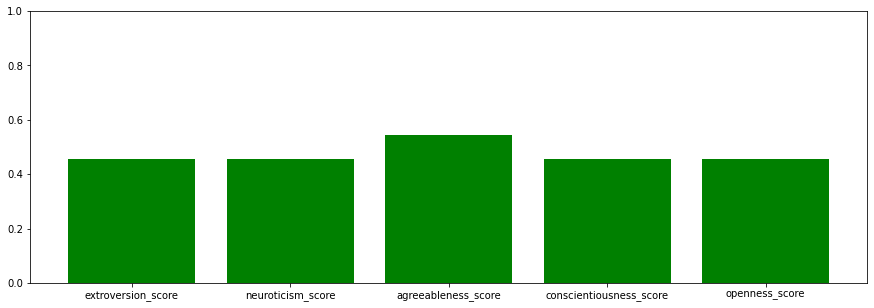

In [45]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()


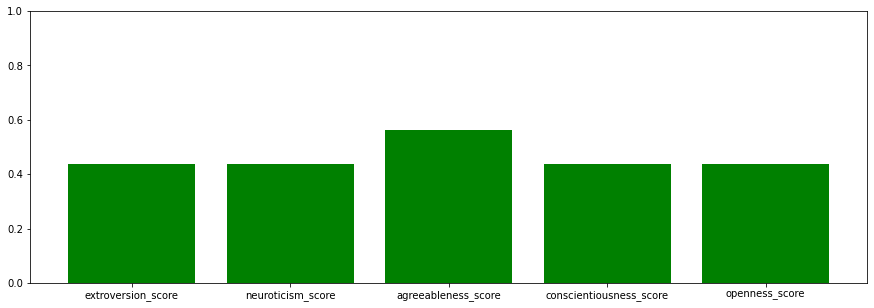

In [46]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

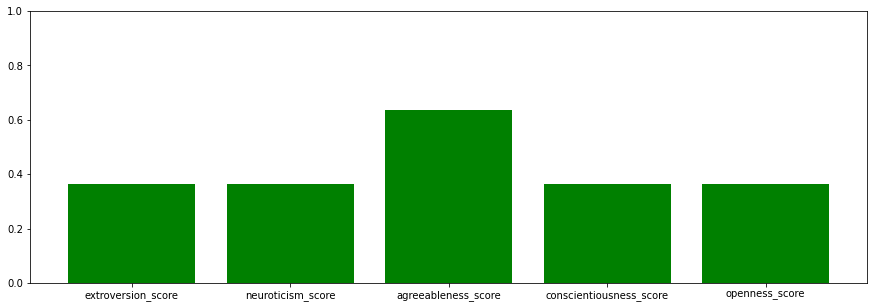

In [47]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

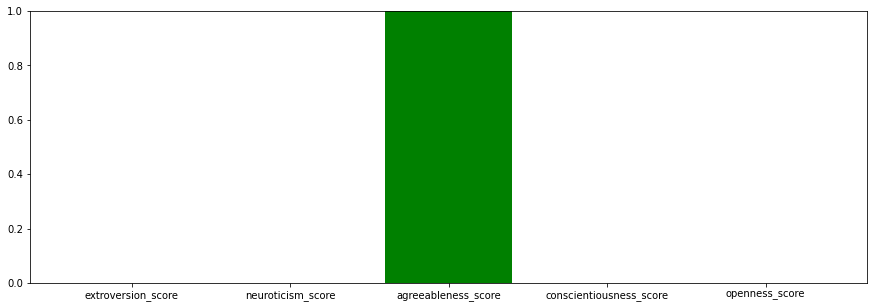

In [48]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

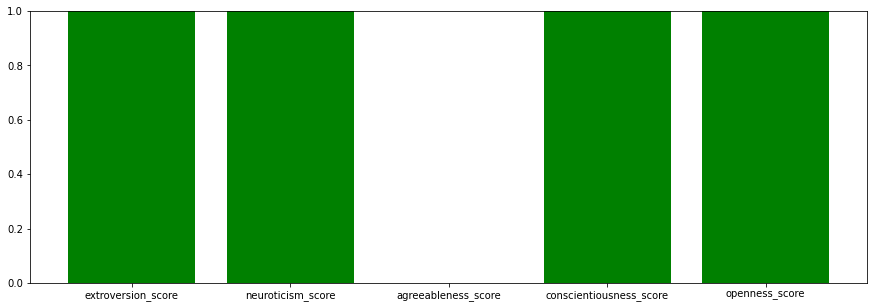

In [49]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()

In [50]:
import joblib

In [51]:
filename = 'final_csv.sav'
joblib.dump(normalized_all_types_scores,filename)

['final_csv.sav']